In [1]:
import os, pprint, json, pickle, csv
import spacy
path_data = "/data/cm/"
path = "/home/rovera/cm/"

In [2]:
metadata = list(csv.reader(open(path_data+"data/metadata/CM_Seiten_Metadaten.csv"), delimiter='\t'))

In [3]:
errors = ('5688', '5687', '4619', '0001', '0965', '(null)')
years = {}

for page in metadata[1:]:
    year = page[10]
    year = year.split('-')[0]
    
    if year not in errors:
        year = int(year)
        if year in years:
            years[year] += 1
        else:
            years[year] = 1

In [4]:
sorted_years = sorted([(k,v) for k,v in years.items()], key=lambda x:x[0], reverse=True)

In [39]:
max_y = max(years.keys())
min_y = min(years.keys())
print(min_y, max_y)

1768 2011


In [5]:
decades = {y: 0 for y in range(1760, 2020, 10)}

In [6]:
for y, count in years.items():
    for d in decades.keys():
        if y >= d and y<= d+9:
            decades[d] += count

In [7]:
from matplotlib import pyplot as plt

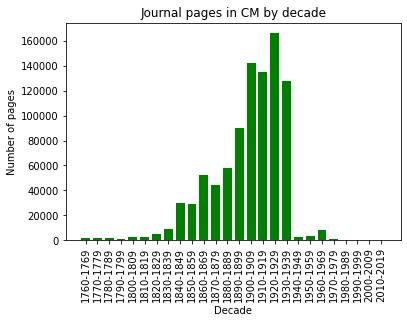

In [13]:
#x_lab = [str(year) for year in decades.keys()]
x = [year for year in decades.keys()]
y = list(decades.values())
x_lab = [str(year)+'-'+str(year+9) for year in decades.keys()]


#x_pos = [i for i, _ in enumerate(x)]

plt.bar(x, y, color='green', width=7.5)
plt.xlabel("Decade")
plt.ylabel("Number of pages")
plt.title("Journal pages in CM by decade")

plt.xticks(x, x_lab, rotation='vertical')

plt.savefig("temporal_distribution.jpg", dpi=250, bbox_inches="tight")
plt.show()
